In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
diabetes_data = pd.read_csv('diabetes.csv')

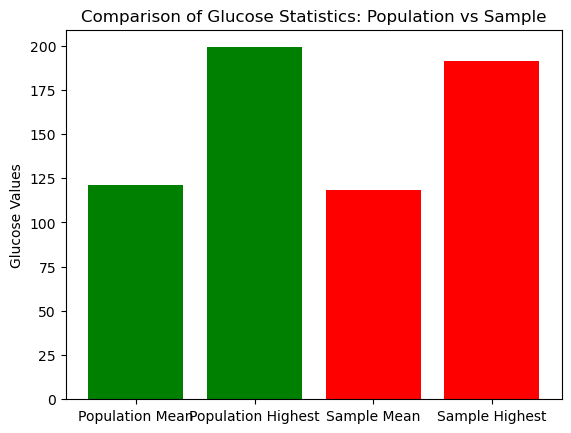

In [8]:
np.random.seed(35)
sample_data = diabetes_data.sample(n=25)
sample_mean_glucose = sample_data['Glucose'].mean()
sample_highest_glucose = sample_data['Glucose'].max()
population_mean_glucose = diabetes_data['Glucose'].mean()
population_highest_glucose = diabetes_data['Glucose'].max()

# Create a bar chart for comparison
labels = ['Population Mean', 'Population Highest', 'Sample Mean', 'Sample Highest']
values = [population_mean_glucose, population_highest_glucose, sample_mean_glucose, sample_highest_glucose]

plt.bar(labels, values, color=['green', 'green', 'red', 'red'])
plt.ylabel('Glucose Values')
plt.title('Comparison of Glucose Statistics: Population vs Sample')
plt.show()

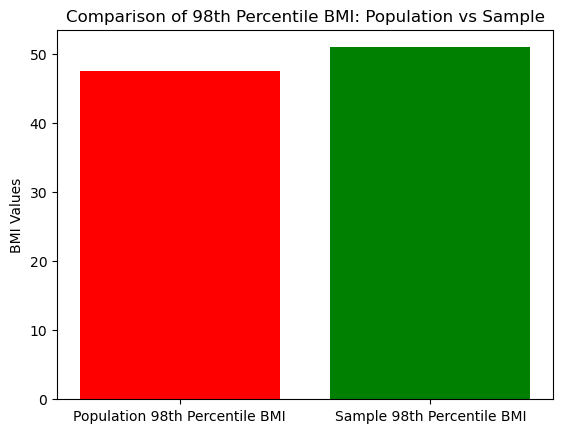

In [5]:
sample_percentile_98_bmi = np.percentile(sample_data['BMI'], 98)
population_percentile_98_bmi = np.percentile(diabetes_data['BMI'], 98)
# Create a bar chart for comparison
labels = ['Population 98th Percentile BMI', 'Sample 98th Percentile BMI']
values = [population_percentile_98_bmi, sample_percentile_98_bmi]

plt.bar(labels, values, color=['red', 'green'])
plt.ylabel('BMI Values')
plt.title('Comparison of 98th Percentile BMI: Population vs Sample')
plt.show()

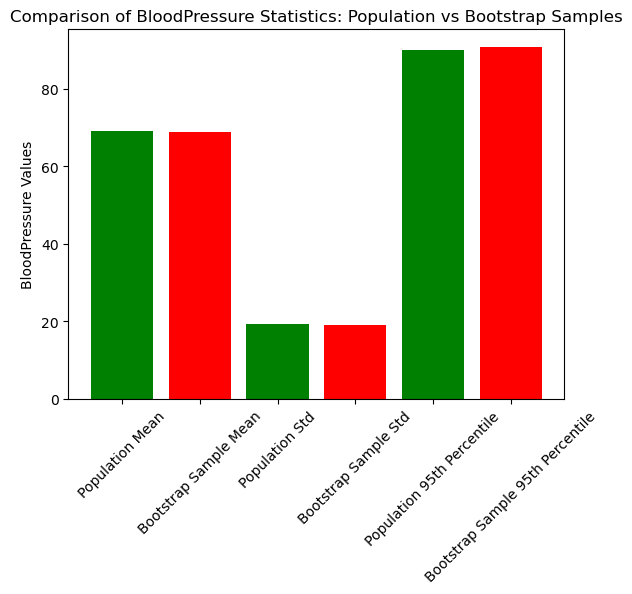

In [7]:
num_bootstrap_samples = 500
sample_size = 150
def calculate_statistics(data):
    mean_bp = np.mean(data['BloodPressure'])
    std_bp = np.std(data['BloodPressure'])
    percentile_95_bp = np.percentile(data['BloodPressure'], 95)
    return mean_bp, std_bp, percentile_95_bp

bootstrap_means = np.zeros(num_bootstrap_samples)
bootstrap_stds = np.zeros(num_bootstrap_samples)
bootstrap_percentiles = np.zeros(num_bootstrap_samples)

# Perform bootstrap sampling
for i in range(num_bootstrap_samples):
    bootstrap_sample = diabetes_data.sample(n=sample_size, replace=True)
    mean_bp, std_bp, percentile_95_bp = calculate_statistics(bootstrap_sample)
    bootstrap_means[i] = mean_bp
    bootstrap_stds[i] = std_bp
    bootstrap_percentiles[i] = percentile_95_bp

# Calculate population statistics for comparison
population_mean_bp, population_std_bp, population_percentile_95_bp = calculate_statistics(diabetes_data)

# Create charts for comparison
labels = ['Population Mean', 'Bootstrap Sample Mean', 'Population Std', 'Bootstrap Sample Std',
          'Population 95th Percentile', 'Bootstrap Sample 95th Percentile']

values = [population_mean_bp, np.mean(bootstrap_means), population_std_bp, np.mean(bootstrap_stds),
          population_percentile_95_bp, np.mean(bootstrap_percentiles)]

plt.bar(labels, values, color=['green', 'red', 'green', 'red', 'green', 'red'])
plt.ylabel('BloodPressure Values')
plt.title('Comparison of BloodPressure Statistics: Population vs Bootstrap Samples')
plt.xticks(rotation=45)
plt.show()

#The mean and maximum of the population are higher than those of the sample.
#The population percentile is higher than the sample percentile, as far as I can tell.
#There is a tiny distinction between bootstrap and population statistics.